In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statannot import add_stat_annotation
import pickle
from numpy import mean
from numpy import std
from pandas import read_csv
import sklearn
import joblib

In [13]:
data = pd.read_csv("Data/calculated_parameters_for_covid_rarefaction.txt", sep="\t", usecols=[1,4,5,6,7])
print(data.head())

              Sample  Frac_of_core_functions_among_all  \
0  681_S255_10000000                          0.848958   
1   681_S255_1000000                          0.971831   
2    681_S255_100000                          0.500000   
3  681_S255_15000000                          0.850515   
4  681_S255_20000000                          0.843434   

   Frac_of_core_functions_found  Species_found_together  \
0                      0.964497                0.658537   
1                      0.816568                0.439024   
2                      0.011834                0.243902   
3                      0.976331                0.658537   
4                      0.988166                0.658537   

   Contributions_per_species  
0                  32.477273  
1                  19.555556  
2                   1.000000  
3                  33.571429  
4                  37.418182  


C:\Users\kizie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


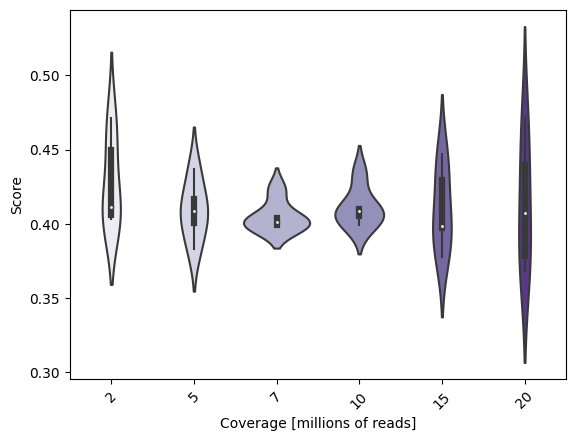

In [14]:
meta= pd.read_csv("Data/metadata_covid_rarefaction.txt", sep="\t", usecols=[0,1])

merged_df = data.merge(meta, left_on='Sample', right_on='Sample', how='inner').drop(['Sample'], axis=1)
merged_df = merged_df.dropna()
sample_list = data.merge(meta, left_on='Sample', right_on='Sample', how='inner')['Sample'].loc[merged_df.index]
labels_list = list(merged_df['Diagnosis'])

feature_list = merged_df.columns[:-1]
X = merged_df.iloc[:,:-1].values
y = merged_df['Diagnosis'].values

rf_fit = joblib.load("q2_pd_model_no_gmhi.pkl")
preds = rf_fit.predict_proba(X)
scores_pred = []
for a in list(preds):
    scores_pred.append(a[1])

scores_pred_df = pd.DataFrame()
scores_pred_df['SampleID'] = sample_list
scores_pred_df['Score'] = scores_pred
scores_pred_df['Category'] = [int(int(a)/1000000) for a in labels_list]
scores_pred_df['Category'] = scores_pred_df['Category'].astype(int)
scores_pred_df = scores_pred_df.sort_values(by="Category", ascending=True)

plt.figure()
ax = sns.violinplot(data=scores_pred_df, x='Category', y="Score", palette = "Purples") #cut=0, 

plt.xticks(rotation=45)
plt.xlabel("")
plt.xlabel("Coverage [millions of reads]")
plt.show()

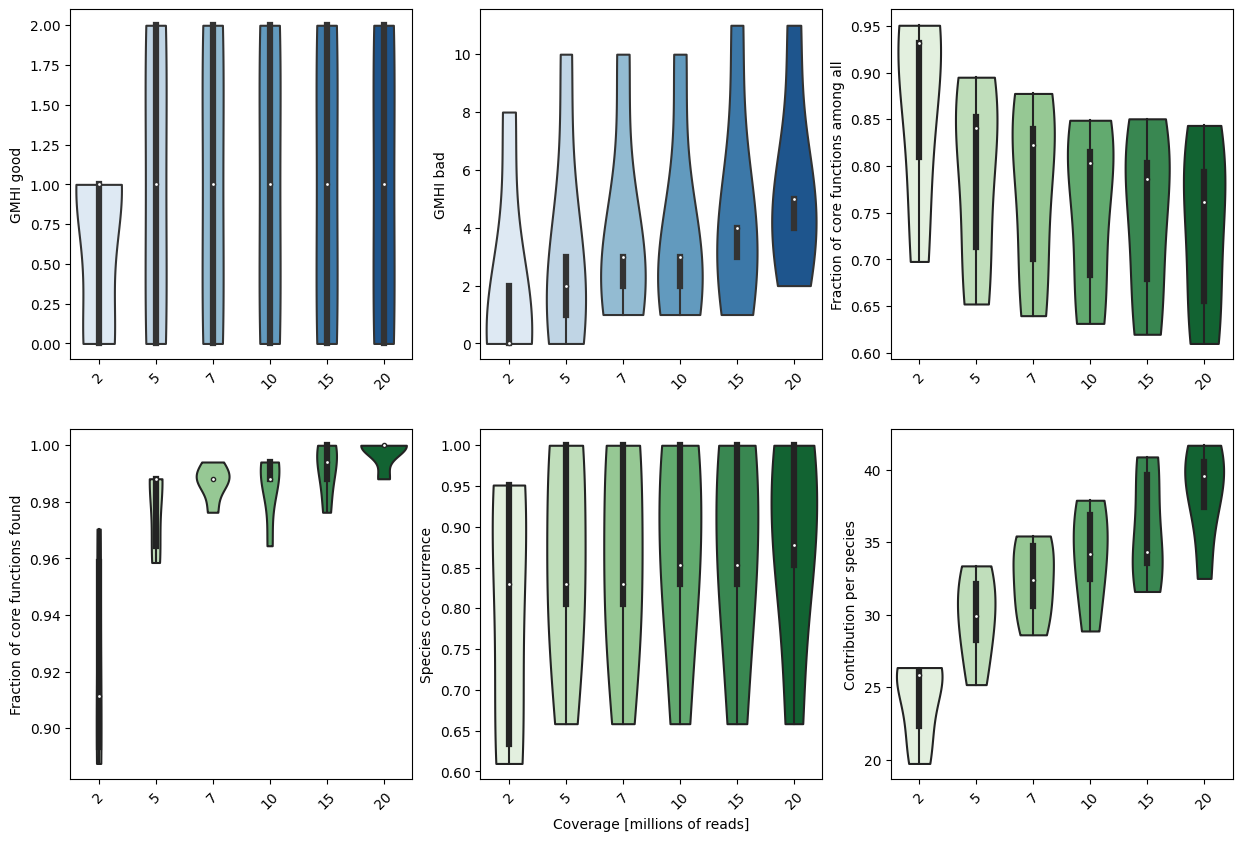

In [16]:
data = pd.read_csv("Data/calculated_parameters_for_covid_rarefaction.txt", sep="\t", usecols=[1,2,3,4,5,6,7])
merged_df = data.merge(meta, left_on='Sample', right_on='Sample', how='inner').drop(['Sample'], axis=1)
merged_df = merged_df.dropna()

merged_df = merged_df.sort_values(by="Diagnosis", ascending=True)
merged_df.columns = ['GMHI_good', 'GMHI_bad', 'Frac_of_core_functions_among_all',
       'Frac_of_core_functions_found', 'Species_found_together',
       'Contributions_per_species', 'Diagnosis']
merged_df['Diagnosis'] = merged_df['Diagnosis']/1000000
merged_df['Diagnosis'] = merged_df['Diagnosis'].astype(int)

plt.figure(figsize=[15,10])
plt.subplot(2,3, 1)
#sns.swarmplot(data=merged_df, y='Gupta_good', x="Diagnosis")
ax = sns.violinplot(data=merged_df, y='GMHI_good', x="Diagnosis", cut=0, palette = "Blues") #.set(xticklabels=[]) 
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("GMHI good")
plt.subplot(2,3, 2)
#sns.swarmplot(data=merged_df, y='Gupta_bad', x="Diagnosis")
ax = sns.violinplot(data=merged_df, y='GMHI_bad', x="Diagnosis", cut=0, palette="Blues")
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("GMHI bad")
plt.subplot(2,3, 3)
#sns.swarmplot(data=merged_df, y='Frac_of_core_functions_among_all', x="Diagnosis")
ax = sns.violinplot(data=merged_df, y='Frac_of_core_functions_among_all', x="Diagnosis", cut=0, palette="Greens")
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Fraction of core functions among all")
plt.subplot(2,3, 4)
#sns.swarmplot(data=merged_df, y='Frac_of_core_functions_found', x="Diagnosis")
ax = sns.violinplot(data=merged_df, y='Frac_of_core_functions_found', x="Diagnosis", cut=0, palette="Greens")
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Fraction of core functions found")
plt.subplot(2,3, 5)
#sns.swarmplot(data=merged_df, y='Species_found_together', x="Diagnosis")
ax = sns.violinplot(data=merged_df, y='Species_found_together', x="Diagnosis", cut=0, palette="Greens")
plt.xticks(rotation=45)
plt.ylabel("Species co-occurrence")
plt.xlabel("Coverage [millions of reads]")
plt.subplot(2,3, 6)
#sns.swarmplot(data=merged_df, y='Contributions_per_species', x="Diagnosis")
ax = sns.violinplot(data=merged_df, y='Contributions_per_species', x="Diagnosis", cut=0, palette="Greens")
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Contribution per species")
plt.show()

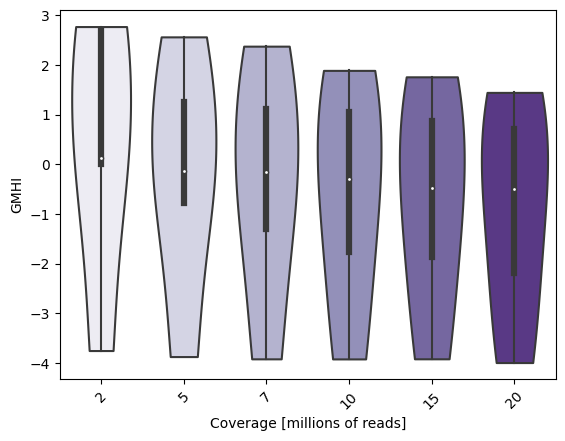

In [10]:
# GMHI stability

data = pd.read_csv('Data/covid_gmhi_rarefaction_scores.txt', sep="\t")
data.columns = ['Diagnosis','GMHI']
data = data.loc[data['Diagnosis'] > 1000000]

scores_pred_df = pd.DataFrame()
scores_pred_df['Score'] = list(data['GMHI'])
scores_pred_df['Category'] = list(data['Diagnosis'])
scores_pred_df['Category'] = scores_pred_df['Category']/1000000
scores_pred_df['Category'] = scores_pred_df['Category'].astype(int)
scores_pred_df = scores_pred_df.sort_values(by="Category")

plt.figure()
ax = sns.violinplot(data=scores_pred_df, x='Category', y="Score", cut=0, palette="Purples")

plt.xticks(rotation=45)
plt.ylabel("GMHI")
plt.xlabel("Coverage [millions of reads]")
plt.show()